<a href="https://colab.research.google.com/github/abhi-lejon/Neural-Networks/blob/master/image_classification_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import os
import datetime
import tensorflow_datasets as tfds
%load_ext tensorboard 
datasets,info=tfds.load(name='fashion_mnist',as_supervised=True,with_info=True,split=['train','test'],batch_size=-1)
#For TPU to use , the data must be in google cloud or in local. so for in order to have data in cpu we use batch_size as -1
#When we set batch size as -1, all the data will be loaded into local CPU RAM.2

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteHMMNE1/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteHMMNE1/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


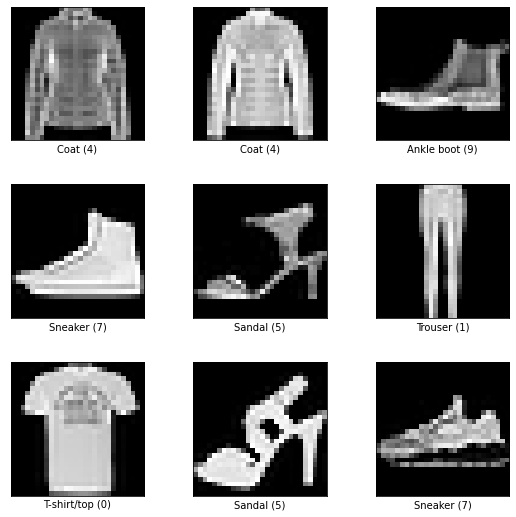

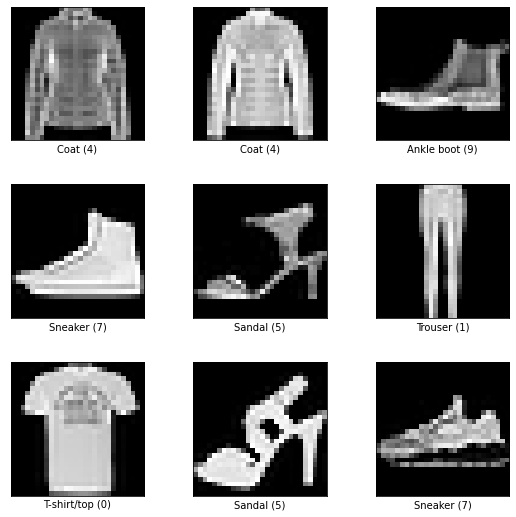

In [ ]:
#This is to know the examples that are in dataset
image_test,label_test=tfds.load(name='fashion_mnist',with_info=True,split='test')
tfds.show_examples(image_test,label_test)

In [ ]:
train,test=tfds.as_numpy(datasets[0]),tfds.as_numpy(datasets[1])

In [ ]:
#If we measure the loss interms of sparse categorical entropy, then one hot encode is not required., If categorical entropy then one hot encode is needed.

In [ ]:
x_train,y_train= train[0]/255, tf.one_hot(train[1],10)
x_test,y_test= test[0]/255, tf.one_hot(test[1],10)

In [ ]:
x_test,x_val=x_test[5000:],x_test[:5000]
y_test,y_val=y_test[5000:],y_test[:5000]

In [ ]:
print(x_train.shape),print(x_test.shape),print(x_val.shape),print(y_train.shape),print(y_test.shape),print(y_val.shape)

(60000, 28, 28, 1)
(5000, 28, 28, 1)
(5000, 28, 28, 1)
(60000, 10)
(5000, 10)
(5000, 10)


(None, None, None, None, None, None)

In [ ]:
#create a model
def create_model():
  model= tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(32,5,padding='same',activation='relu',input_shape=(28,28,1))),
  model.add(tf.keras.layers.MaxPooling2D()),
  model.add(tf.keras.layers.Dropout(0.25)),

  model.add(tf.keras.layers.Conv2D(64,5,padding='same',activation='relu',input_shape=(28,28,1))),
  model.add(tf.keras.layers.MaxPooling2D()),
  model.add(tf.keras.layers.Dropout(0.25)),

  model.add(tf.keras.layers.Conv2D(128,5,padding='same',activation='relu',input_shape=(28,28,1))),
  model.add(tf.keras.layers.MaxPooling2D()),
  model.add(tf.keras.layers.Dropout(0.25)),

  model.add(tf.keras.layers.Conv2D(256,5,padding='same',activation='relu',input_shape=(28,28,1))),
  model.add(tf.keras.layers.MaxPooling2D()),
  model.add(tf.keras.layers.Dropout(0.25)),
       
  model.add(tf.keras.layers.Flatten()),
  model.add(tf.keras.layers.Dense(512,activation='relu')),
  model.add(tf.keras.layers.Dropout(0.5)),
  model.add(tf.keras.layers.Dense(10,activation='softmax'))
  return model

In [ ]:
#Compile the model
model=create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3,),loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train.astype(np.float32),np.float32(y_train),
          batch_size=64,
          epochs=20,
          steps_per_epoch=20,   #Steps_per_epoch we get by dividing the dataset by 256.
          validation_data=(x_val.astype(np.float32),np.float32(y_val)),
          validation_freq=5
          ) # Performs validation after each epoch



Epoch 1/20
20/20 [==============================] - 0s 11ms/step - loss: 2.1359 - accuracy: 0.1961
Epoch 2/20
20/20 [==============================] - 0s 8ms/step - loss: 1.4403 - accuracy: 0.4492
Epoch 3/20
20/20 [==============================] - 0s 7ms/step - loss: 1.1047 - accuracy: 0.5430
Epoch 4/20
20/20 [==============================] - 0s 7ms/step - loss: 0.9140 - accuracy: 0.6562
Epoch 5/20
20/20 [==============================] - 1s 26ms/step - loss: 0.8401 - accuracy: 0.6758 - val_loss: 0.7615 - val_accuracy: 0.7154
Epoch 6/20
20/20 [==============================] - 0s 7ms/step - loss: 0.7669 - accuracy: 0.7266
Epoch 7/20
20/20 [==============================] - 0s 7ms/step - loss: 0.6829 - accuracy: 0.7328
Epoch 8/20
20/20 [==============================] - 0s 7ms/step - loss: 0.6820 - accuracy: 0.7273
Epoch 9/20
20/20 [==============================] - 0s 7ms/step - loss: 0.7058 - accuracy: 0.7398
Epoch 10/20
15/20 [=====================>........] - ETA: 0s - loss: 0.668

In [ ]:
model.save('/tmp/fminst.hdf5')

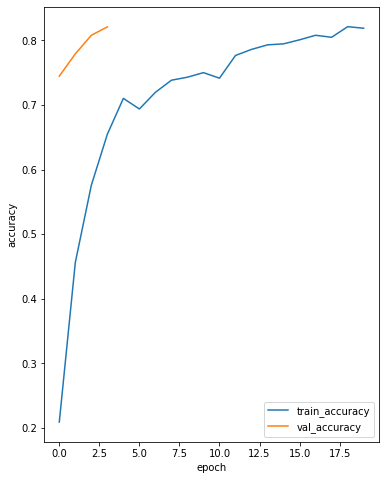

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

In [ ]:
fminst_load=tf.keras.models.load_model('/tmp/fminst.hdf5',compile=True)

In [ ]:
fminst_load.evaluate(x_test,y_test)

157/157 [==============================] - 0s 3ms/step - loss: 0.4539 - accuracy: 0.8288


[0.4539094865322113, 0.8288000226020813]

In [ ]:
y_pred=fminst_load.predict(x_test)

In [ ]:
y_pred

array([[1.31254943e-04, 9.98894155e-01, 3.34271863e-05, ...,
        1.76838985e-05, 8.13863062e-06, 3.10284267e-05],
       [9.04534161e-01, 1.35410630e-07, 5.75616832e-05, ...,
        4.90792340e-09, 6.95005747e-06, 5.81558801e-09],
       [5.46157360e-01, 6.19380618e-04, 3.61743174e-03, ...,
        7.17802686e-05, 5.57033392e-03, 5.81511158e-05],
       ...,
       [4.66850176e-02, 5.76233923e-01, 3.47312093e-02, ...,
        1.03733046e-02, 9.01818275e-03, 1.65961217e-02],
       [1.00831697e-02, 3.80681013e-04, 9.46939290e-02, ...,
        6.52603339e-05, 2.81909388e-02, 6.90620873e-05],
       [1.06562209e-06, 9.99994755e-01, 1.09425244e-07, ...,
        4.51560815e-08, 1.53250612e-09, 1.65724927e-07]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
labels=info.features['label'].names

In [ ]:
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
print(classification_report(y_test.numpy().argmax(axis=1),y_pred.argmax(axis=1),target_names=info.features['label'].names))

              precision    recall  f1-score   support

 T-shirt/top       0.71      0.88      0.79       489
     Trouser       0.99      0.96      0.98       513
    Pullover       0.83      0.47      0.60       478
       Dress       0.86      0.86      0.86       510
        Coat       0.67      0.82      0.74       518
      Sandal       0.96      0.97      0.96       494
       Shirt       0.52      0.47      0.50       519
     Sneaker       0.94      0.93      0.94       484
         Bag       0.91      0.97      0.94       496
  Ankle boot       0.95      0.95      0.95       499

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.82      5000
weighted avg       0.83      0.83      0.82      5000



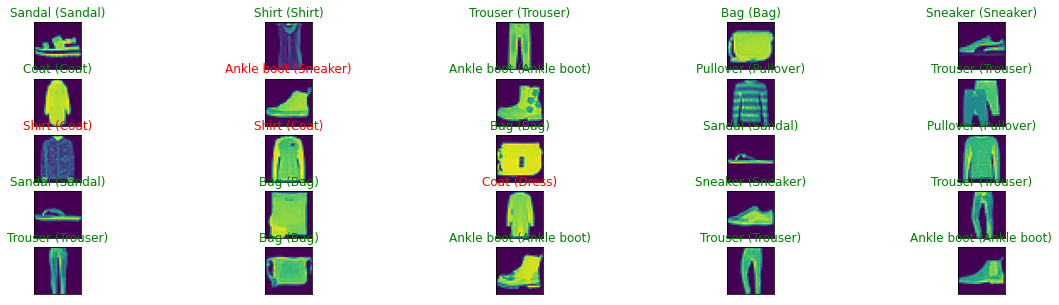

In [ ]:
figure=plt.figure(figsize=(20,5))
for i ,index in enumerate(np.random.choice(x_test.shape[0],size=25,replace=False)):
  ax=figure.add_subplot(5,5,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_test[index]))
  predict_index=np.argmax(y_pred[index])
  true_index=np.argmax(y_test.numpy()[index])
  ax.set_title("{} ({})".format(labels[predict_index],labels[true_index]),color=("green" if predict_index==true_index else "red"))
